In [1]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set_style("ticks")
hfont = {'fontname':'Myriad Pro'}
import matplotlib.ticker as mtick
from matplotlib import gridspec
import matplotlib.colors as colors
import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hfn
import inputfraction_functions as fracfn

In [2]:
path = Path(os.getcwd()).parents[0]
alldatapath = os.path.join(path,'data')
datapath = os.path.join(alldatapath, 'clean')

fracpath = os.path.join(path, 'input_fraction')
fracpath_csv = os.path.join(fracpath, 'csv')

figpath = os.path.join(path, 'Figures')
hfn.dir_check(figpath)
    
figs43path = os.path.join(figpath, 'FigS12+S13')
hfn.dir_check(figs43path)

figs43panelpaths = os.path.join(figs43path, 'panels')
hfn.dir_check(figs43panelpaths)

In [3]:
df_frac = pd.read_csv(os.path.join(fracpath_csv, 'df_all_fraction.csv'))

In [4]:
areas_sel = ['VISp','VISpm','VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'LGd', 'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD',]

In [5]:
parsalldf_all, parsabovedf_all, parsbelowdf_all, chowdf_all = fracfn.find_breakpoint(df_frac, areas_sel, [150, 200, 500, 700])

In [6]:
chowdf_filt = chowdf_all[chowdf_all['area'].isin(areas_sel)]

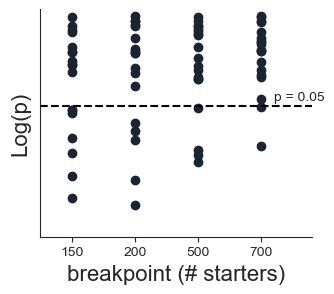

In [7]:
f = plt.figure(figsize=(3.5,3.25))

gs = f.add_gridspec(1,1)
ax = f.add_subplot(gs[:,:])
for g in chowdf_filt['area'].unique():
    ax.scatter(chowdf_filt['threshold'][chowdf_filt['area']==g].astype(str), np.log10(chowdf_filt['chow_pval'][chowdf_filt['area']==g]),  c = 'xkcd:dark', label = g)

plt.xlabel('breakpoint (# starters)', fontsize = 16)
plt.ylabel('Log(p)', fontsize = 16)
plt.axhline(np.log10(0.05), ls = '--', c= 'k')
plt.text(3.2, np.log10(0.06),'p = 0.05')
plt.xlim(-0.5, 3.8)
plt.ylim(-3.2,0.1)

plt.gca().get_yaxis().set_ticks([])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.subplots_adjust( top=0.85, bottom=0.15)
f.savefig(os.path.join(figs43panelpaths, 'figS12_b.png'),  bbox_inches=None)
f.savefig(os.path.join(figs43panelpaths, 'figS12_b.eps'),  bbox_inches=None, format = 'eps')